<a href="https://colab.research.google.com/github/parwinderau/machinelearning/blob/main/DecisionTreeCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import the dataset and the decisiontreeclassifier libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [2]:
#load data
iris = load_iris()

In [3]:
#define x and y from the data 
X = iris.data
y = iris.target

In [4]:
#build the decision tree 

tree_clf = DecisionTreeClassifier(random_state=42) #try to set the max_depth=3

tree_clf.fit(X,y)

DecisionTreeClassifier(random_state=42)

In [5]:
#check the score
print('Score: ', tree_clf.score(X,y))

Score:  1.0


In [6]:
#Compute the feature importance for each of the features
tree_clf.feature_importances_

array([0.01333333, 0.        , 0.56405596, 0.42261071])

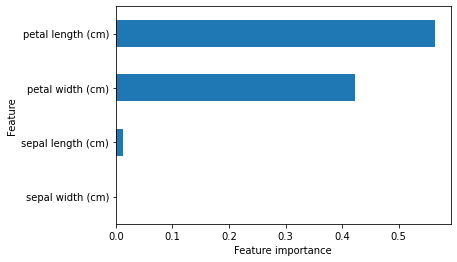

In [7]:
#visualize feature importance in sorted order
#import needed libraries
import pandas as pd
import matplotlib.pyplot as plt

#create a series with the feature importance scores and take the feature name as index
feat_importances = pd.Series(tree_clf.feature_importances_, index=iris.feature_names)

#In order to get it ordered, take the four smallest values of the series and plot it as a barplot
feat_importances.nsmallest(4).plot(kind='barh')
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

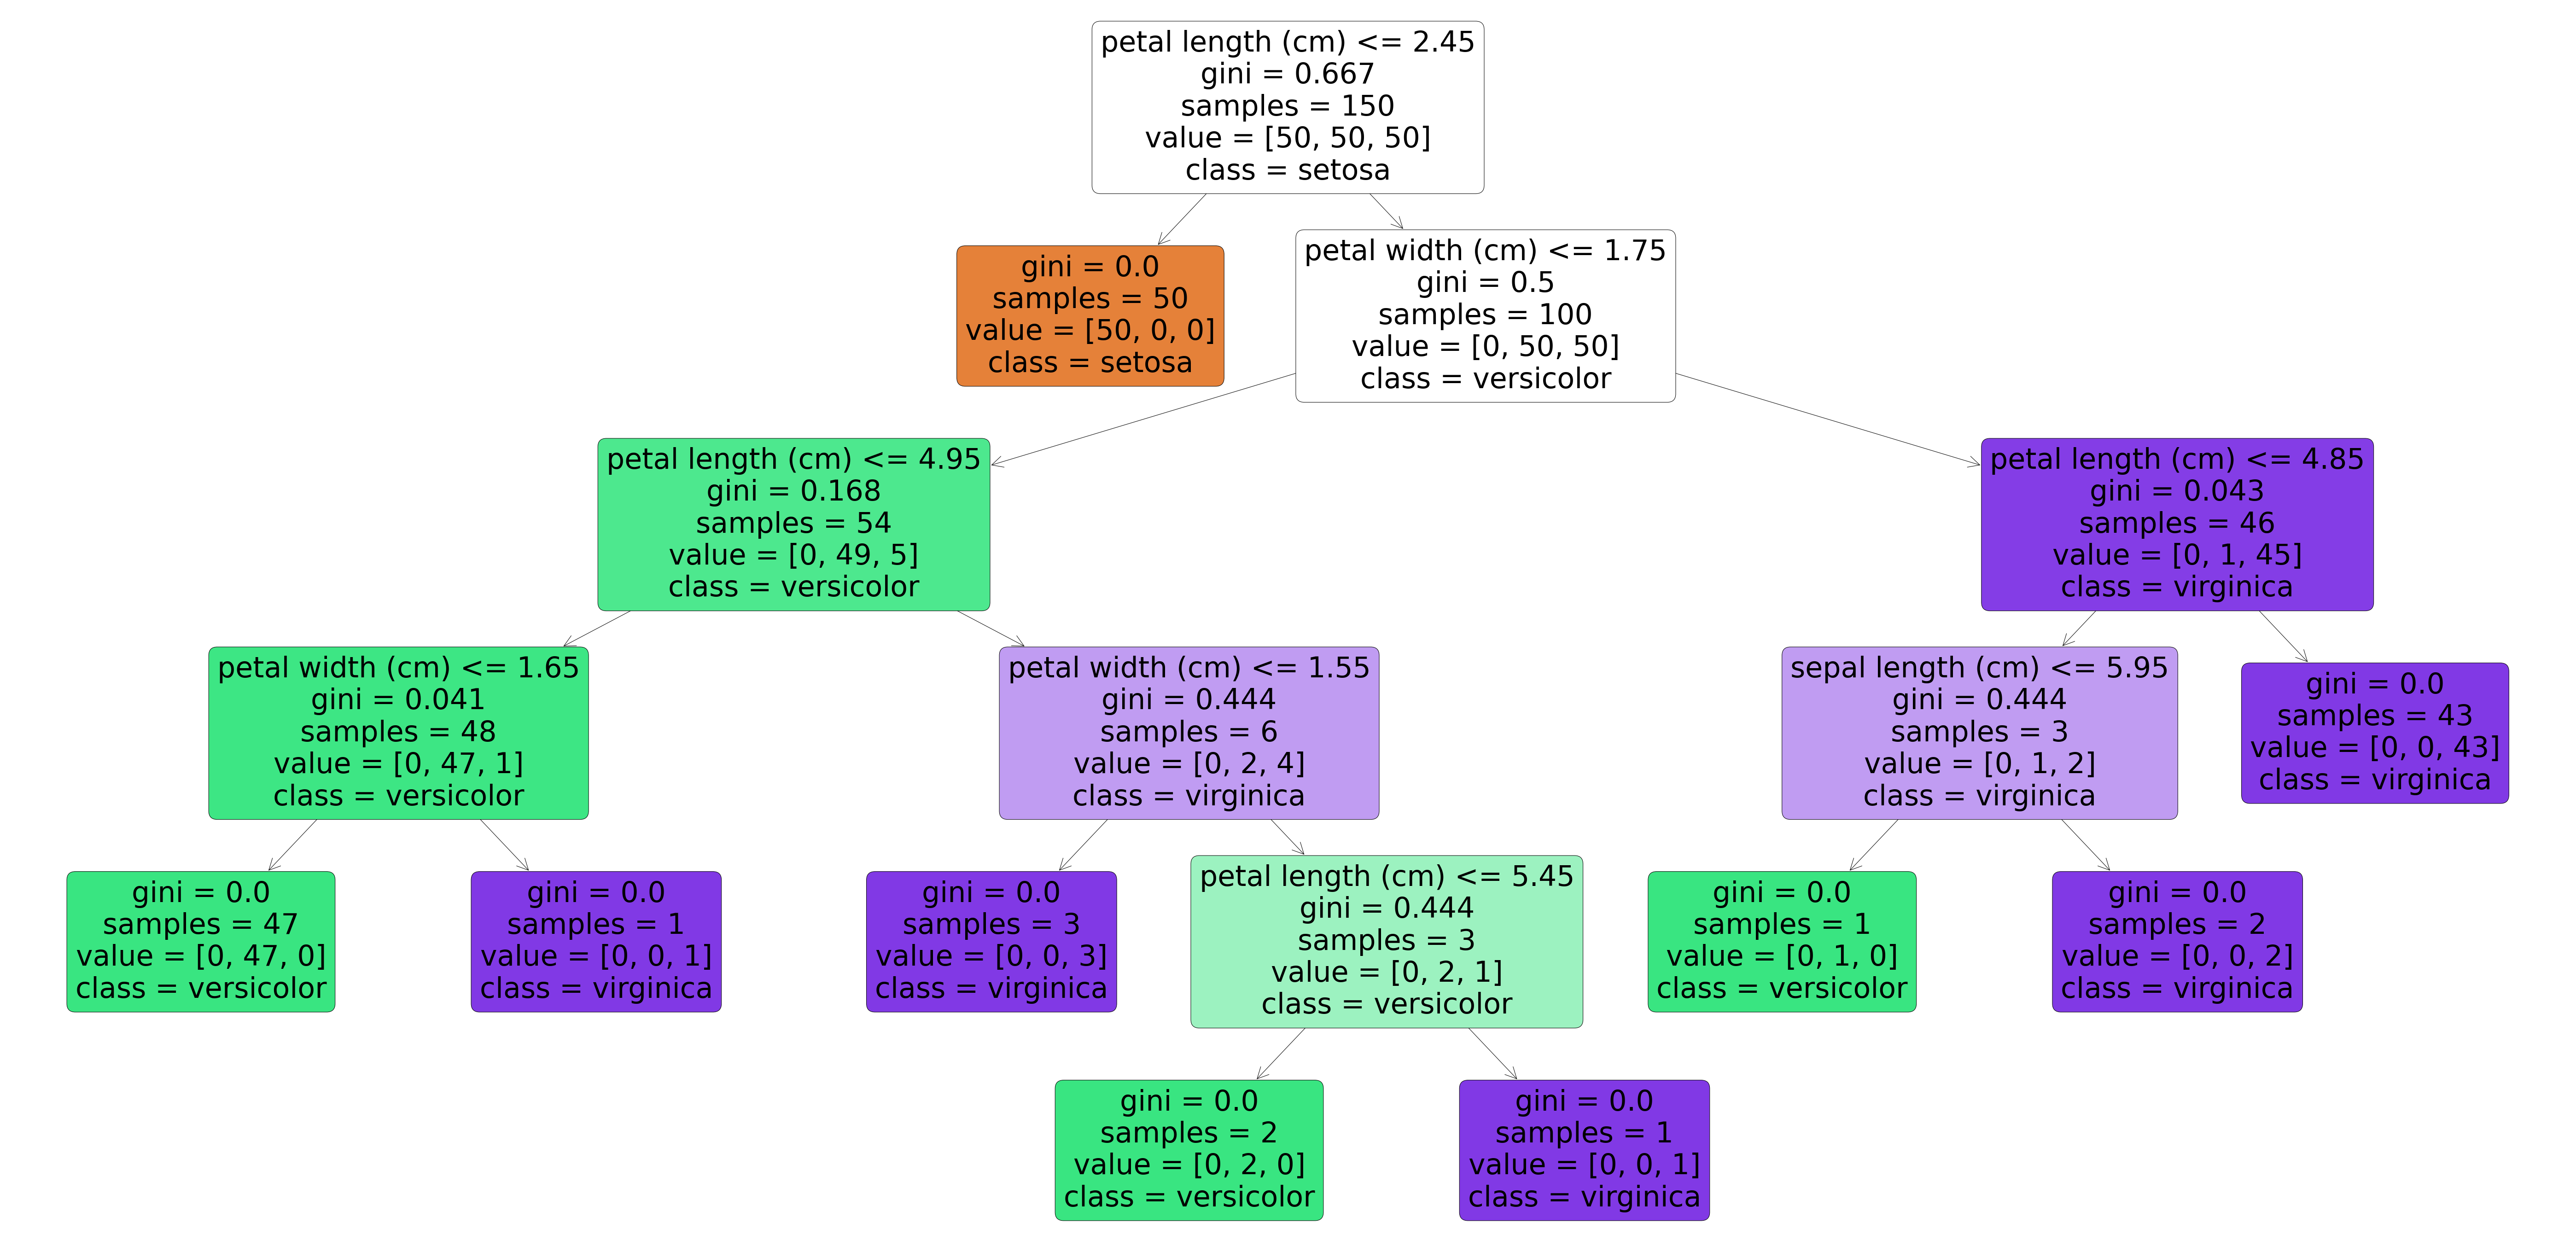

In [9]:
#imports for creating the visual of the built tree 
from sklearn import tree
import matplotlib.pyplot as plt

#Define the size of the figure
plt.figure(figsize=(100,50))

#call the function to plot the tree and define the feature names and target names
tree.plot_tree(tree_clf, feature_names= iris.feature_names, class_names=iris.target_names, rounded=True, filled=True)
plt.show()

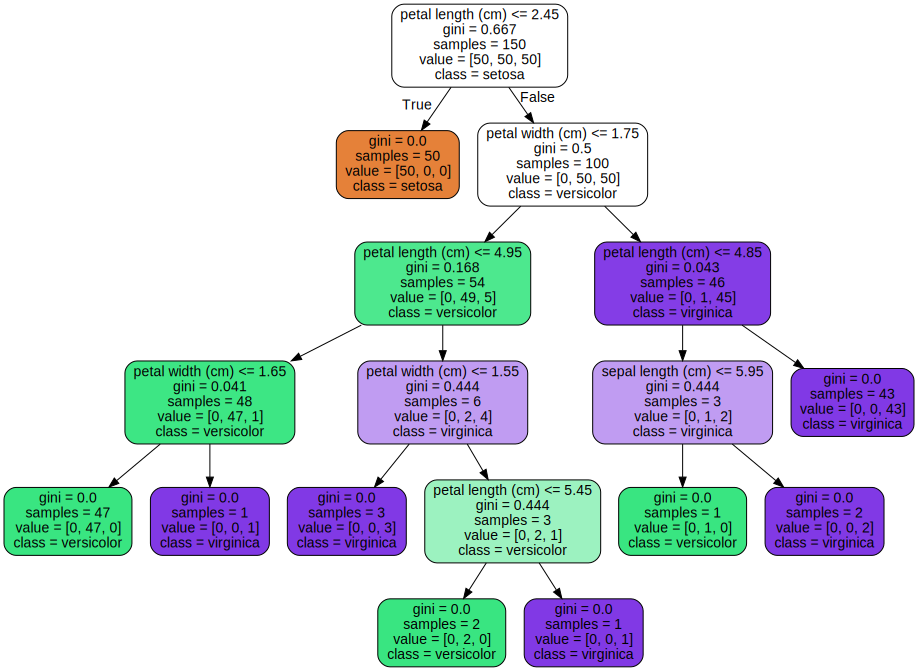

In [10]:
#import graphviz from the tree library for better visualization 

import graphviz
dot_data = tree.export_graphviz(tree_clf, feature_names= iris.feature_names, class_names=iris.target_names, rounded=True, filled=True)
graph = graphviz.Source(dot_data, format='png')
graph

In [11]:
#get png file
graph.render('Decision_tree')

'Decision_tree.png'

In [12]:
#Install and import dtreeviz to visualize the decision tree in another way
!pip install dtreeviz
from dtreeviz.trees import dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 848 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.7-py3-none-any.whl size=68151 sha256=59a714d6705ed7a575a4d2c71909dc7ce8966a061382c57d2a04b20a34062f78
  Stored in directory: /root/.cache/pip/wheels/bf/ba/9f/87c689d8d3c2916793f2dccc57d3dc3b283e0ccf8cb4ca4cad
Successfully built dtreeviz


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


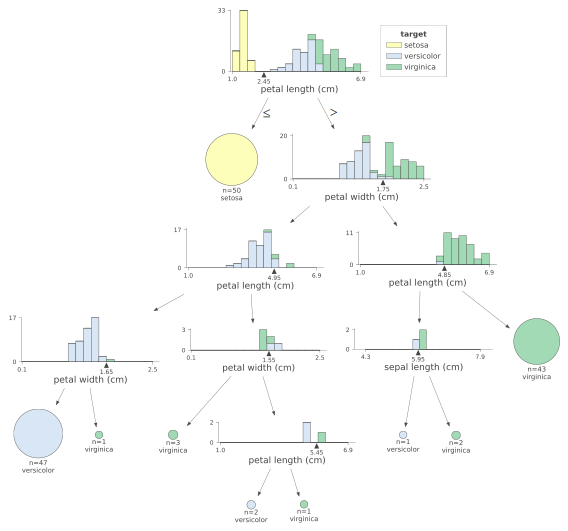

In [13]:
#Create the plot
viz = dtreeviz(tree_clf, X, y,
                target_name="target",
                feature_names=iris.feature_names,
                class_names=list(iris.target_names))

viz

In [ ]:
viz.save('decision_tree.svg')